In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset in pandas
df = pd.read_csv("airtel.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (4751, 5)


,Open,High,Low,Close,Volume
0,18.268192,19.691093,18.245243,19.002592,2351048.0
1,19.507492,19.943542,19.277992,19.484543,1240948.0
2,19.255043,20.104193,19.163242,19.943542,908019.0
3,19.874693,19.966494,19.553392,19.576344,395880.0
4,19.736994,20.287792,19.622244,19.989443,595730.0


In [3]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df['Close_Tom'] =  df['Close']
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,18.268192,19.691093,18.245243,2351048.0,19.002592,19.002592
1,19.507492,19.943542,19.277992,1240948.0,19.484543,19.484543
2,19.255043,20.104193,19.163242,908019.0,19.943542,19.943542
3,19.874693,19.966494,19.553392,395880.0,19.576344,19.576344
4,19.736994,20.287792,19.622244,595730.0,19.989443,19.989443


In [4]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close_Tom'] =  df['Close_Tom'].shift(-1)
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,18.268192,19.691093,18.245243,2351048.0,19.002592,19.484543
1,19.507492,19.943542,19.277992,1240948.0,19.484543,19.943542
2,19.255043,20.104193,19.163242,908019.0,19.943542,19.576344
3,19.874693,19.966494,19.553392,395880.0,19.576344,19.989443
4,19.736994,20.287792,19.622244,595730.0,19.989443,20.333693


In [5]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_Tom']]
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,18.268192,19.691093,18.245243,2351048.0,19.002592,19.484543
1,19.507492,19.943542,19.277992,1240948.0,19.484543,19.943542
2,19.255043,20.104193,19.163242,908019.0,19.943542,19.576344
3,19.874693,19.966494,19.553392,395880.0,19.576344,19.989443
4,19.736994,20.287792,19.622244,595730.0,19.989443,20.333693


In [6]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open         0
High         0
Low          0
Volume       0
Close        0
Close_Tom    0
dtype: int64

<AxesSubplot:>

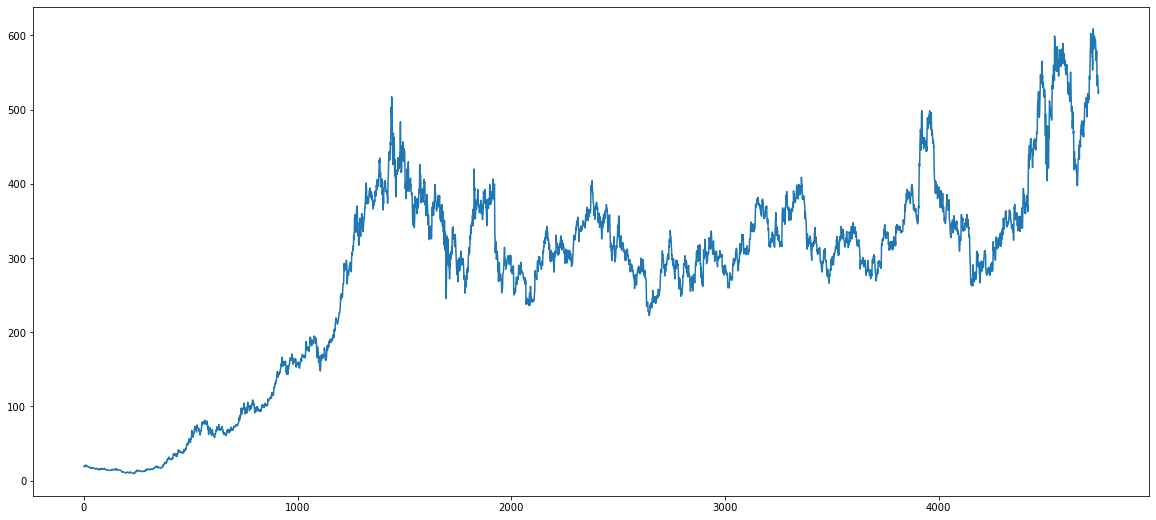

In [7]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [8]:
#columns for x and y
x  = df[['Open','High','Low','Volume', 'Close']]
y = df['Close_Tom']

In [9]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume', 'Close']])
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,0.013991,0.015947,0.014857,0.007721,0.015816,19.484543
1,0.016028,0.016358,0.016608,0.004076,0.016621,19.943542
2,0.015613,0.016621,0.016413,0.002982,0.017386,19.576344
3,0.016631,0.016396,0.017074,0.001300,0.016774,19.989443
4,0.016405,0.016920,0.017191,0.001957,0.017463,20.333693


In [10]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3544, 5)
(1182, 5)
(3544,)
(1182,)


---
# Random Forest

In [11]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [12]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
3417,321.162201,321.836382,0.674181
2307,344.662964,344.748432,0.085468
316,15.101094,15.398526,0.297432
1617,325.591522,342.155658,16.564136
1328,378.789612,373.436760,5.352852
1998,288.297791,297.379571,9.081780
962,161.866287,159.739289,2.126998
541,62.102676,66.182040,4.079364
3,19.989443,19.990590,0.001147
2738,314.368988,314.926217,0.557229


In [13]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9973776847772712
Mean Absolute Error: 4.806733721143824
Mean Squared  Error: 50.60012509600123
Root Mean Squared Error: 7.113376490528336
Loss: 4.806733721143824


---
# k-NN

In [14]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [15]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
3417,321.162201,259.304311,61.857890
2307,344.662964,392.925456,48.262492
316,15.101094,272.362030,257.260936
1617,325.591522,317.557187,8.034335
1328,378.789612,304.454590,74.335022
1998,288.297791,320.023163,31.725372
962,161.866287,298.288686,136.422399
541,62.102676,143.605754,81.503078
3,19.989443,237.731318,217.741875
2738,314.368988,337.204234,22.835246


In [16]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [17]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.09423339294473876
Mean Absolute Error: 96.7268654139876
Mean Squared  Error: 17477.648464048612
Root Mean Squared Error: 132.2030576955337
Loss: 96.7268654139876


---
# Decision Tree

In [18]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
3417,321.162201,314.598480,6.563721
2307,344.662964,345.994080,1.331116
316,15.101094,16.317444,1.216350
1617,325.591522,341.587677,15.996155
1328,378.789612,372.157074,6.632538
1998,288.297791,294.173004,5.875213
962,161.866287,155.830444,6.035843
541,62.102676,64.030479,1.927803
3,19.989443,19.323893,0.665550
2738,314.368988,303.261200,11.107788


In [20]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9948231007901102
Mean Absolute Error: 6.637367785956006
Mean Squared  Error: 99.8933100640852
Root Mean Squared Error: 9.994664079601936
Loss: 6.637367785956006


---
# Linear Regression

In [21]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[-9.43456131e-02  1.18490506e-01  1.01334040e-01 -5.35249718e-08
  8.72115162e-01]
0.6788028828419783


In [23]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
3417,321.162201,322.432579,1.270378
2307,344.662964,345.610214,0.947250
316,15.101094,15.890485,0.789391
1617,325.591522,341.539633,15.948111
1328,378.789612,374.150553,4.639059
1998,288.297791,295.651479,7.353688
962,161.866287,157.673032,4.193255
541,62.102676,65.486657,3.383981
3,19.989443,20.202614,0.213171
2738,314.368988,316.843949,2.474961


In [24]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.9978026215491869
Mean Absolute Error: 4.352063073552846
Mean Squared  Error: 42.40055639790635
Root Mean Squared Error: 6.511570962364332
Loss: 4.352063073552846
